In [1]:
!pip install lime

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=24869994085ac9b231aa607bdf478c73ef35fe5a3309a30dadd5db33da8fd88d
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers, Model, Input

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import numpy as np
import pandas as pd
import time
import psutil
import os
import tensorflow as tf

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Crime_hotspot/Dataset/Crimes_-_2019_to_Present_20250930.csv')
weather=pd.read_excel('/content/drive/MyDrive/Crime_hotspot/Dataset/weather_data.xls')


In [5]:
weather

,Local time in Chicago / Midway (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,20.09.2025 22:00,22.2,745.6,761.8,NaN,82.0,Wind blowing from the north-northeast,2.0,NaN,NaN,...,NaN,NaN,16.0,18.9,Trace of precipitation,3.0,NaN,NaN,NaN,NaN
1,20.09.2025 16:00,25.6,745.9,762.1,NaN,60.0,"Calm, no wind",0.0,NaN,NaN,...,NaN,NaN,16.0,17.2,0.5,3.0,NaN,NaN,NaN,NaN
2,20.09.2025 10:00,23.3,747.1,763.4,NaN,69.0,"Calm, no wind",0.0,NaN,NaN,...,NaN,NaN,16.0,17.2,NaN,NaN,NaN,NaN,NaN,NaN
3,20.09.2025 04:00,22.2,746.4,762.5,NaN,68.0,Wind blowing from the south,5.0,NaN,NaN,...,NaN,NaN,16.0,16.1,Trace of precipitation,3.0,NaN,NaN,NaN,NaN
4,19.09.2025 22:00,26.1,745.6,761.5,NaN,52.0,Wind blowing from the north-northeast,2.0,NaN,NaN,...,NaN,NaN,16.0,15.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,02.01.2019 03:00,-2.2,751.4,769.5,NaN,88.0,Wind blowing from the south-west,2.0,NaN,NaN,...,NaN,NaN,9.0,-3.9,Trace of precipitation,3.0,NaN,NaN,NaN,NaN
9860,01.01.2019 21:00,-2.2,752.9,770.9,NaN,85.0,Wind blowing from the north-northwest,3.0,NaN,NaN,...,NaN,NaN,12.0,-4.4,Trace of precipitation,3.0,NaN,NaN,NaN,NaN
9861,01.01.2019 15:00,-1.7,752.4,770.2,NaN,85.0,Wind blowing from the north-northeast,4.0,NaN,NaN,...,NaN,NaN,12.0,-3.9,Trace of precipitation,3.0,NaN,NaN,NaN,NaN
9862,01.01.2019 09:00,-0.6,751.9,769.6,NaN,85.0,Wind blowing from the north,4.0,NaN,NaN,...,NaN,NaN,16.0,-2.8,Trace of precipitation,3.0,NaN,NaN,NaN,NaN


In [6]:
weather.columns

Index(['Local time in Chicago / Midway (airport)', 'T', 'Po', 'P', 'Pa', 'U',
       'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl',
       'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

# CRIME

In [7]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11555127,JC101856,01/01/2019 03:57:00 PM,0000X W WASHINGTON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,BANK,False,False,...,42.0,32.0,14,1176114.0,1900822.0,2019,01/10/2019 03:16:50 PM,41.883217,-87.628754,"(41.883217427, -87.628753807)"
1,11554052,JC101651,01/01/2019 04:00:00 PM,001XX S PULASKI RD,0460,BATTERY,SIMPLE,STREET,True,False,...,28.0,26.0,08B,1149754.0,1898946.0,2019,01/10/2019 03:16:50 PM,41.878623,-87.725598,"(41.87862256, -87.72559838)"
2,11553808,JC101414,01/01/2019 04:00:00 PM,050XX W CONGRESS PKWY,0820,THEFT,$500 AND UNDER,STREET,False,False,...,29.0,25.0,06,1142590.0,1897205.0,2019,01/10/2019 03:16:50 PM,41.873981,-87.751947,"(41.873981228, -87.751946738)"
3,11553354,JC100903,01/01/2019 04:00:00 PM,0000X N MICHIGAN AVE,0890,THEFT,FROM BUILDING,RESTAURANT,False,False,...,42.0,32.0,06,1177309.0,1900530.0,2019,01/10/2019 03:16:50 PM,41.882389,-87.624375,"(41.882389156, -87.624374606)"
4,11553403,JC101041,01/01/2019 04:00:00 PM,028XX N CLARK ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,44.0,6.0,06,1171359.0,1919209.0,2019,01/10/2019 03:16:50 PM,41.933778,-87.645673,"(41.933778153, -87.645673011)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616332,13975969,JJ425352,09/21/2025 12:00:00 AM,031XX S WELLS ST,0710,THEFT,THEFT FROM MOTOR VEHICLE,RESIDENCE,False,False,...,11.0,34.0,06,1175131.0,1884127.0,2025,09/28/2025 03:42:59 PM,41.837427,-87.632864,"(41.837427273, -87.632863567)"
1616333,13976430,JJ425187,09/21/2025 12:00:00 AM,021XX S CALUMET AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,HOTEL / MOTEL,False,False,...,3.0,33.0,14,1178840.0,1890202.0,2025,09/28/2025 03:42:59 PM,41.854014,-87.619068,"(41.854013684, -87.619068382)"
1616334,13975864,JJ425410,09/21/2025 12:00:00 AM,043XX W WABANSIA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,...,26.0,23.0,11,1146986.0,1910940.0,2025,09/28/2025 03:42:59 PM,41.911589,-87.735455,"(41.911588738, -87.735455121)"
1616335,13976000,JJ425621,09/21/2025 12:00:00 AM,050XX N WOLCOTT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,40.0,4.0,11,1162901.0,1933808.0,2025,09/28/2025 03:42:59 PM,41.974020,-87.676344,"(41.974020487, -87.676344418)"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616337 entries, 0 to 1616336
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1616337 non-null  int64  
 1   Case Number           1616337 non-null  object 
 2   Date                  1616337 non-null  object 
 3   Block                 1616337 non-null  object 
 4   IUCR                  1616337 non-null  object 
 5   Primary Type          1616337 non-null  object 
 6   Description           1616337 non-null  object 
 7   Location Description  1607717 non-null  object 
 8   Arrest                1616337 non-null  bool   
 9   Domestic              1616337 non-null  bool   
 10  Beat                  1616337 non-null  int64  
 11  District              1616337 non-null  int64  
 12  Ward                  1616288 non-null  float64
 13  Community Area        1616227 non-null  float64
 14  FBI Code              1616337 non-

In [9]:
df.isna().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,8620
Arrest,0
Domestic,0


In [10]:
df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,357459
BATTERY,293815
CRIMINAL DAMAGE,181212
ASSAULT,141981
DECEPTIVE PRACTICE,116496
MOTOR VEHICLE THEFT,114060
OTHER OFFENSE,102949
ROBBERY,57327
BURGLARY,55135


In [11]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [12]:
df['Ward'].unique()

array([42., 28., 29., 44., 39., 10., 16., 17.,  7., 26., 27., 24., 21.,
       15., 14., 22.,  8.,  6.,  5., 46., 35., 37.,  9.,  2., 25.,  3.,
        1., 32., 31., 20., 18., 13., 12., 41., 49., 11., 36., 43., 34.,
        4., 45., 50., 19., 38., 47., 30., 33., 40., 23., 48., nan])

In [13]:
df['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'BATTERY', 'THEFT',
       'OFFENSE INVOLVING CHILDREN', 'NARCOTICS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ASSAULT', 'OTHER OFFENSE',
       'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BURGLARY', 'ROBBERY',
       'PUBLIC PEACE VIOLATION', 'WEAPONS VIOLATION', 'INTIMIDATION',
       'CRIMINAL SEXUAL ASSAULT', 'CRIM SEXUAL ASSAULT', 'STALKING',
       'ARSON', 'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE',
       'PROSTITUTION', 'LIQUOR LAW VIOLATION', 'HUMAN TRAFFICKING',
       'KIDNAPPING', 'GAMBLING', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'PUBLIC INDECENCY', 'RITUALISM'], dtype=object)

# FILTERING DATA

In [14]:
filtered_df= df[(df['Community Area'] == 28) & (df['Primary Type'] == 'THEFT')]

In [15]:
filtered_df =filtered_df.sort_index()
filtered_df

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 16:30:00,11586815,JC141509,001XX N GREEN ST,0890,THEFT,FROM BUILDING,RESTAURANT,False,False,1224,...,27.0,28.0,06,1170711.0,1901002.0,2019,02/08/2019 04:05:45 PM,41.883831,-87.648589,"(41.883831371, -87.648588508)"
2019-01-01 17:53:00,11553411,JC101053,008XX W FULTON MARKET,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1214,...,27.0,28.0,06,1170577.0,1902075.0,2019,01/10/2019 03:16:50 PM,41.886779,-87.649049,"(41.886778688, -87.649049147)"
2019-01-02 05:30:00,11555377,JC103349,006XX W MONROE ST,0810,THEFT,OVER $500,STREET,False,False,121,...,42.0,28.0,06,1172247.0,1899816.0,2019,01/10/2019 03:16:50 PM,41.880543,-87.642983,"(41.88054314, -87.642983249)"
2019-01-02 07:00:00,11555657,JC102803,002XX S CANAL ST,0820,THEFT,$500 AND UNDER,OTHER COMMERCIAL TRANSPORTATION,False,False,121,...,42.0,28.0,06,1173178.0,1899203.0,2019,01/10/2019 03:16:50 PM,41.878840,-87.639583,"(41.878840427, -87.639582928)"
2019-01-02 08:00:00,11576334,JC128314,009XX W WASHINGTON BLVD,0810,THEFT,OVER $500,VEHICLE - DELIVERY TRUCK,False,False,1224,...,25.0,28.0,06,1170224.0,1900729.0,2019,01/27/2019 04:03:13 PM,41.883093,-87.650385,"(41.883092889, -87.650384784)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-20 05:00:00,13972924,JJ421750,010XX S DESPLAINES ST,0810,THEFT,OVER $500,STREET,False,True,124,...,28.0,28.0,06,1172075.0,1895790.0,2025,09/28/2025 03:42:59 PM,41.869499,-87.643734,"(41.869499313, -87.643733583)"
2025-09-20 12:05:00,13972919,JJ421748,010XX W LAKE ST,0860,THEFT,RETAIL THEFT,DRUG STORE,False,False,1214,...,27.0,28.0,06,1169328.0,1901620.0,2025,09/28/2025 03:42:59 PM,41.885557,-87.653649,"(41.885557376, -87.65364901)"
2025-09-20 14:30:00,13973042,JJ421976,012XX S CANAL ST,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,124,...,28.0,28.0,06,1173315.0,1894646.0,2025,09/28/2025 03:42:59 PM,41.866333,-87.639215,"(41.866332671, -87.639215203)"


In [16]:
# ts = filtered_df.resample('W').size()

In [17]:
filtered_df.isna().sum()

,0
ID,0
Case Number,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0
Beat,0


In [18]:
# HANDELING NULL VALUES
filtered_df["Latitude"].fillna(filtered_df["Latitude"].mean(), inplace=True)
filtered_df["Longitude"].fillna(filtered_df["Longitude"].mean(), inplace=True)
filtered_df["X Coordinate"].fillna(filtered_df["X Coordinate"].mean(), inplace=True)
filtered_df["Y Coordinate"].fillna(filtered_df["Y Coordinate"].mean(), inplace=True)
filtered_df["Location"].fillna(f"({filtered_df['Latitude'].mean()}, {filtered_df['Longitude'].mean()})", inplace=True)

In [19]:
filtered_df.isna().sum()

,0
ID,0
Case Number,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0
Beat,0


# EDA

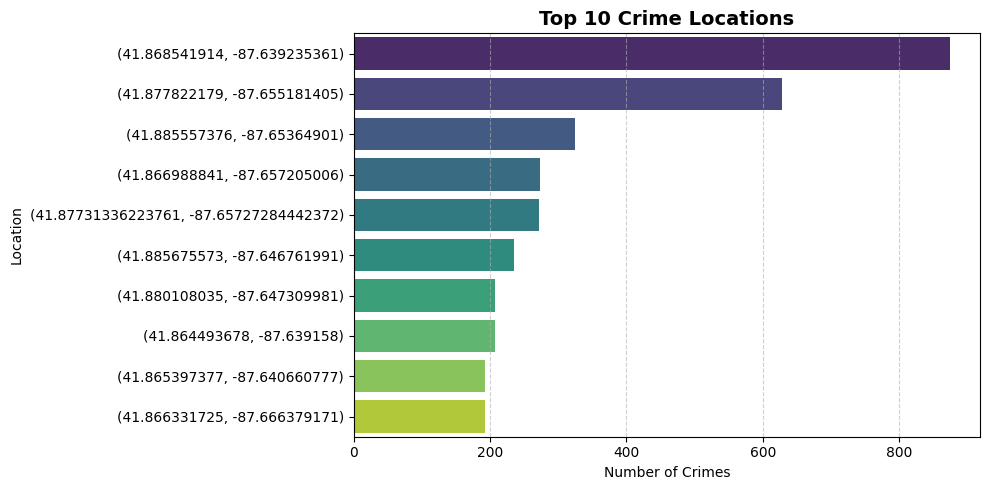

In [20]:
plt.figure(figsize=(10,5))
top10= filtered_df['Location'].value_counts().head(10)
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 Crime Locations', fontsize=14, weight='bold')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

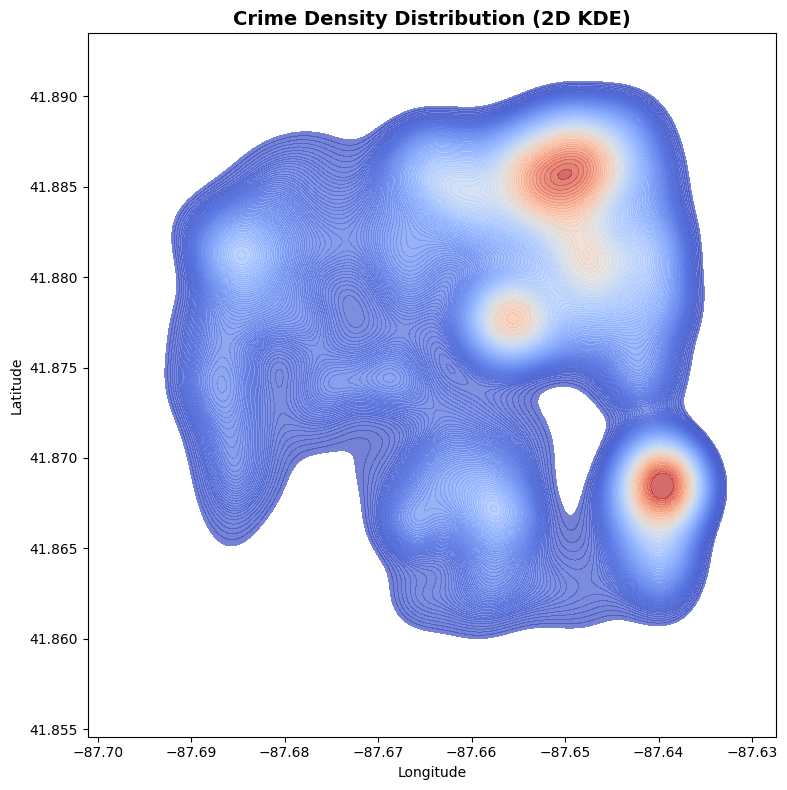

In [21]:
plt.figure(figsize=(8,8))
sns.kdeplot(
    x=filtered_df['Longitude'],
    y=filtered_df['Latitude'],
    fill=True,
    cmap='coolwarm',
    levels=100,
    alpha=0.7,
    thresh=0.05
)
plt.title('Crime Density Distribution (2D KDE)', fontsize=14, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


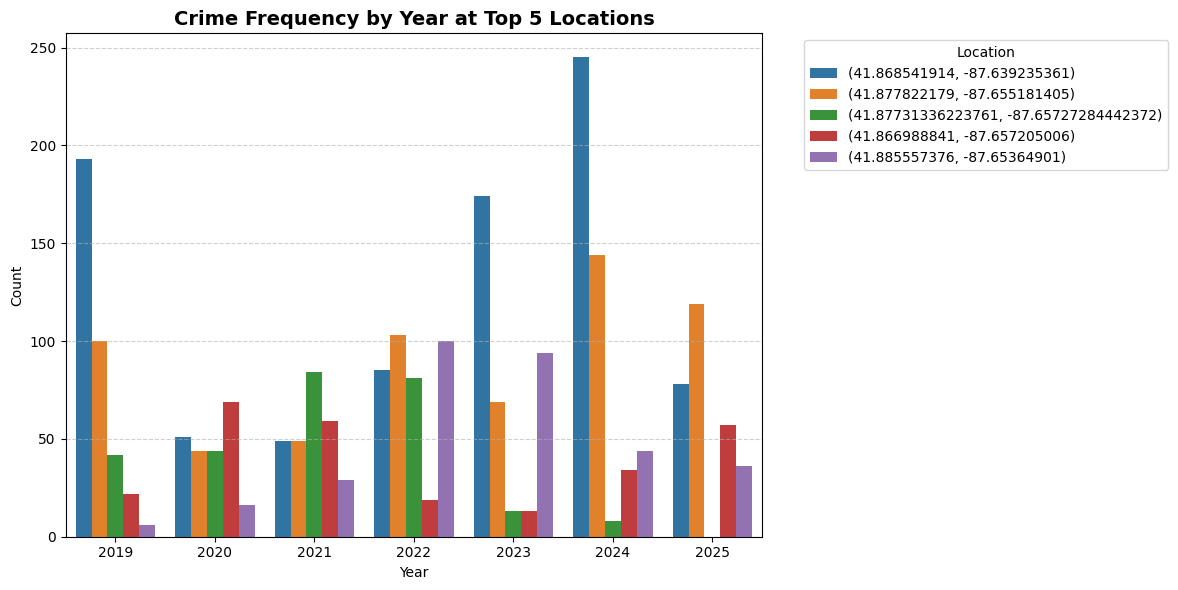

In [22]:
top_locs=filtered_df['Location'].value_counts().head(5).index
subset=filtered_df[filtered_df['Location'].isin(top_locs)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='Year', hue='Location', palette='tab10')
plt.title('Crime Frequency by Year at Top 5 Locations', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

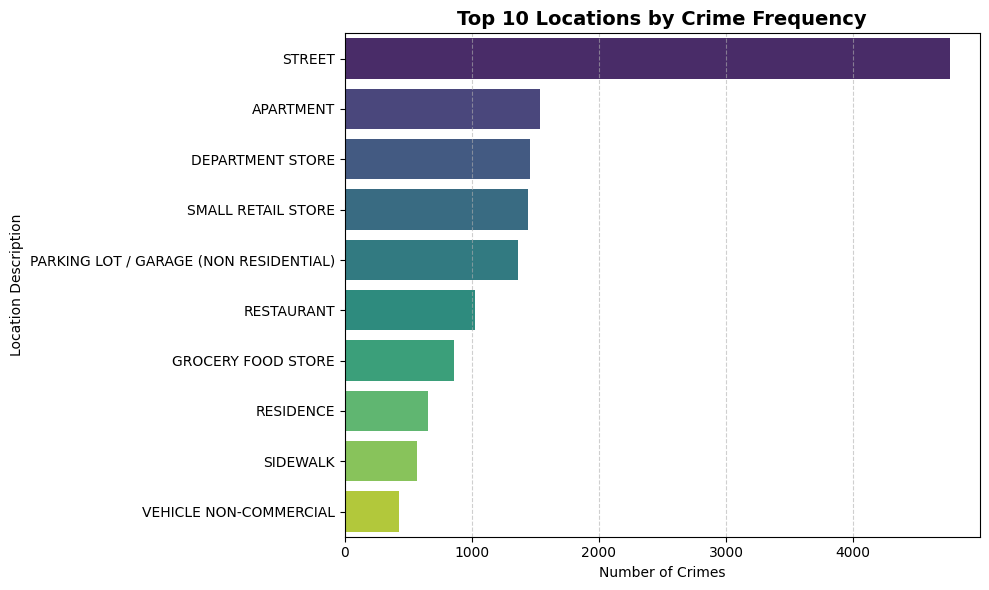

In [23]:
plt.figure(figsize=(10,6))
top10= filtered_df['Location Description'].value_counts().head(10)
sns.barplot(y=top10.index, x=top10.values, palette='viridis')
plt.title('Top 10 Locations by Crime Frequency', fontsize=14, weight='bold')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

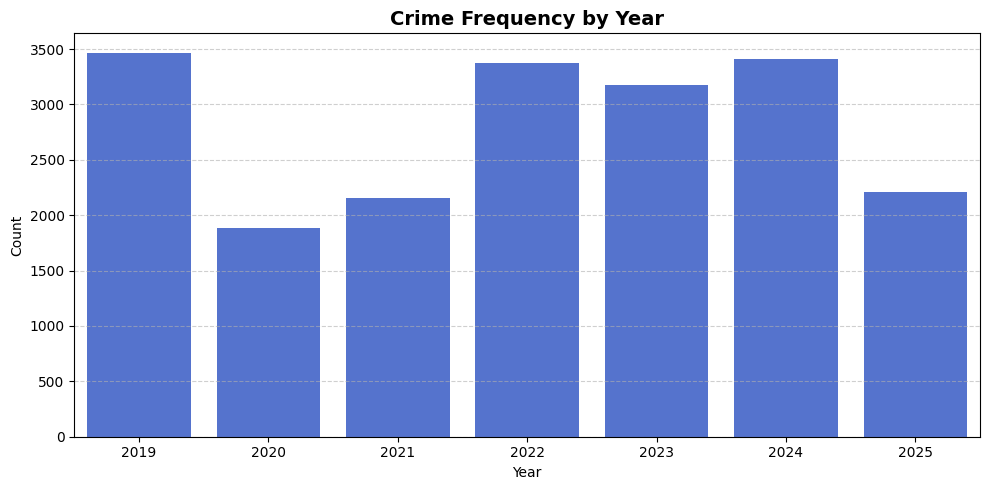

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=filtered_df, x='Year', color='royalblue')
plt.title('Crime Frequency by Year', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


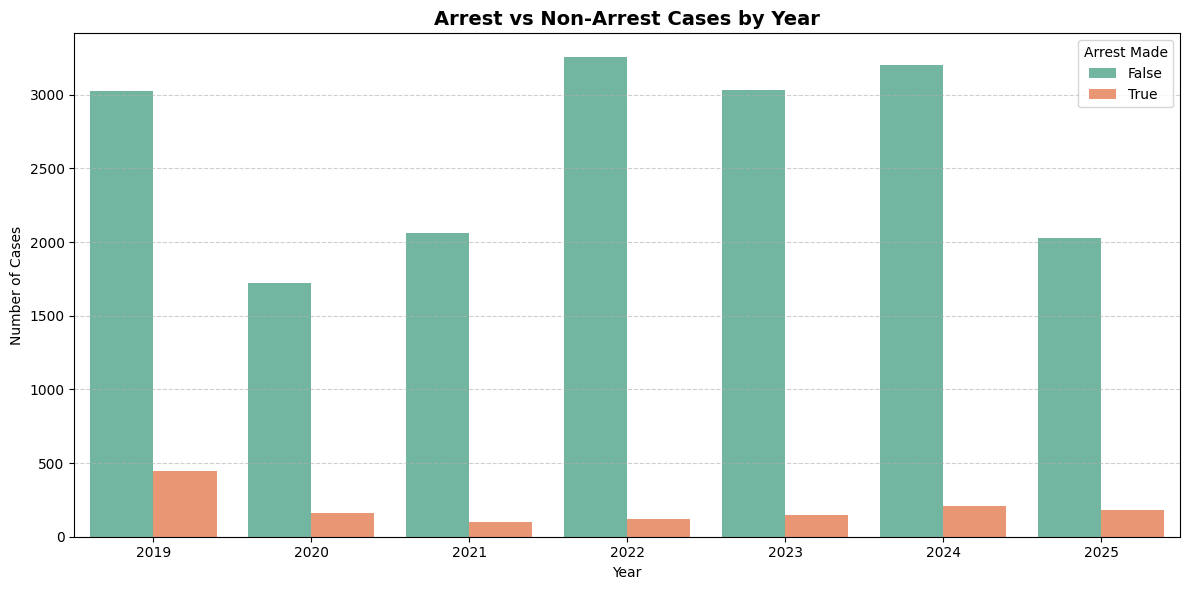

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, x='Year', hue='Arrest', palette='Set2')
plt.title('Arrest vs Non-Arrest Cases by Year', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Arrest Made')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# FEATURE ENGINEERING AND PREPROCESIING(CRIME DATA)

In [26]:
import holidays
filtered_df['crime_count']=1
# 1. Daily aggregation
daily_df= filtered_df.resample('D').agg({
    'crime_count': 'count',
    'Arrest': 'sum',
    'District': 'nunique'
})

# 2. Time-based features
daily_df['day_of_week']= daily_df.index.dayofweek
daily_df['is_weekend']= daily_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 3. Holiday indicator (US holidays example)
us_holidays = holidays.UnitedStates()
daily_df['is_holiday']=daily_df.index.to_series().apply(lambda x: 1 if x in us_holidays else 0)

# 4. Group-based averages
daily_df['weekday_avg']= (
    daily_df.groupby(daily_df.index.dayofweek)['crime_count']
    .transform(lambda x: x.shift(1).expanding().mean())
)

# Month average (cumulative mean up to yesterday)
daily_df['month_avg']= (
    daily_df.groupby(daily_df.index.month)['crime_count']
    .transform(lambda x: x.shift(1).expanding().mean())
)

# Weekend average (cumulative mean only for weekends, else 0)
daily_df['weekend_avg']= (
    daily_df.groupby(daily_df.index.dayofweek)['crime_count']
    .transform(lambda x: x.shift(1).expanding().mean())
)
daily_df.loc[daily_df['is_weekend'] == 0, 'weekend_avg']= 0

daily_df[['weekday_avg', 'month_avg', 'weekend_avg']] = (
    daily_df[['weekday_avg', 'month_avg', 'weekend_avg']].fillna(method="bfill")
)


# Add lag features
daily_df['lag_1']=daily_df['crime_count'].shift(1)   # yesterday
daily_df['lag_7']=daily_df['crime_count'].shift(7)   # same day last week
daily_df=daily_df.dropna()


daily_df

,crime_count,Arrest,District,day_of_week,is_weekend,is_holiday,weekday_avg,month_avg,weekend_avg,lag_1,lag_7
Date,,,,,,,,,,,
2019-01-08,12,1,3,1,0,0,2.000000,7.857143,0.000000,12.0,2.0
2019-01-09,10,0,3,2,0,0,9.000000,8.375000,0.000000,12.0,9.0
2019-01-10,12,3,2,3,0,0,8.000000,8.555556,0.000000,10.0,8.0
2019-01-11,14,1,2,4,0,0,9.000000,8.900000,0.000000,12.0,9.0
2019-01-12,7,2,2,5,1,0,9.000000,9.363636,9.000000,14.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-16,6,1,2,1,0,0,7.880000,9.056410,0.000000,16.0,7.0
2025-09-17,6,0,1,2,0,0,8.114286,9.040816,0.000000,6.0,13.0
2025-09-18,5,0,3,3,0,0,8.260000,9.025381,0.000000,6.0,10.0


# WEATHER

In [27]:
weather_df= weather[['Local time in Chicago / Midway (airport)', 'T',  'U', 'Ff']]
weather_df.columns= ['datetime', 'temperature',  'humidity', 'wind_speed']

In [28]:
weather_df

,datetime,temperature,humidity,wind_speed
0,20.09.2025 22:00,22.2,82.0,2.0
1,20.09.2025 16:00,25.6,60.0,0.0
2,20.09.2025 10:00,23.3,69.0,0.0
3,20.09.2025 04:00,22.2,68.0,5.0
4,19.09.2025 22:00,26.1,52.0,2.0
...,...,...,...,...
9859,02.01.2019 03:00,-2.2,88.0,2.0
9860,01.01.2019 21:00,-2.2,85.0,3.0
9861,01.01.2019 15:00,-1.7,85.0,4.0
9862,01.01.2019 09:00,-0.6,85.0,4.0


# EDA (WEATHER DATA)

In [29]:
tempdf=weather_df.copy()
tempdf['datetime'] = pd.to_datetime(tempdf['datetime'], format='%d.%m.%Y %H:%M', errors='coerce')

# Extract useful time features
tempdf['year']=tempdf['datetime'].dt.year
tempdf['month']=tempdf['datetime'].dt.month
tempdf['day']=tempdf['datetime'].dt.day
tempdf['hour']=tempdf['datetime'].dt.hour

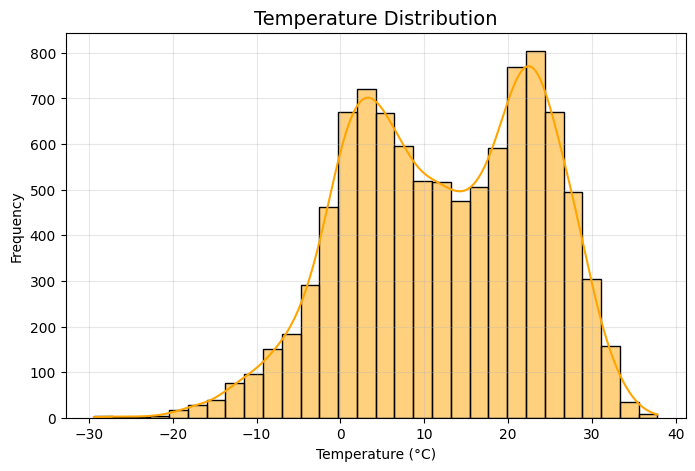

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(tempdf['temperature'], kde=True, bins=30, color='orange')
plt.title('Temperature Distribution', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


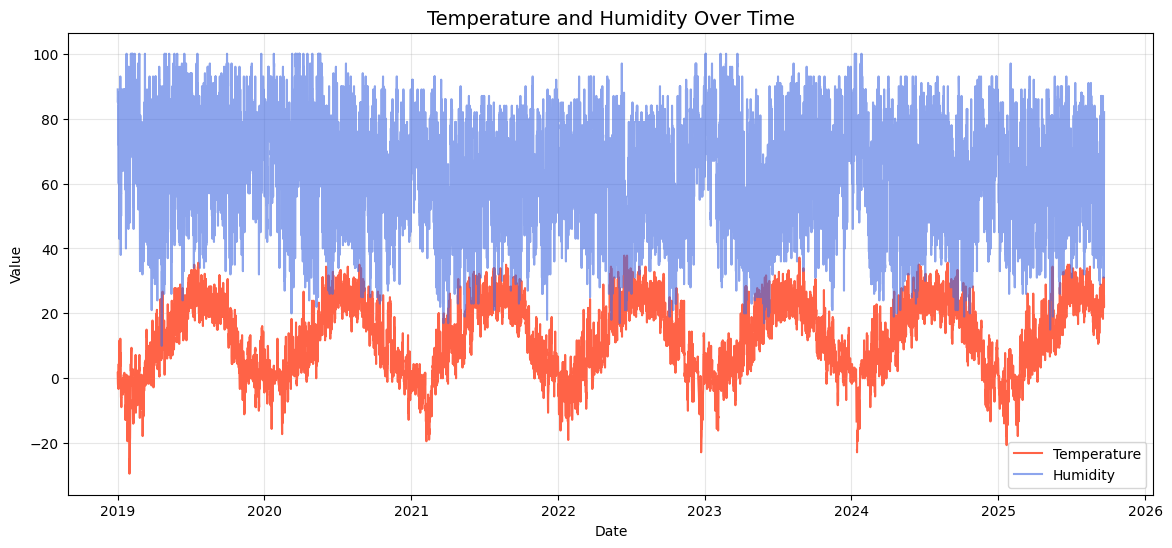

In [31]:
plt.figure(figsize=(14,6))
plt.plot(tempdf['datetime'], tempdf['temperature'], color='tomato', label='Temperature')
plt.plot(tempdf['datetime'], tempdf['humidity'], color='royalblue', label='Humidity', alpha=0.6)
plt.title('Temperature and Humidity Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

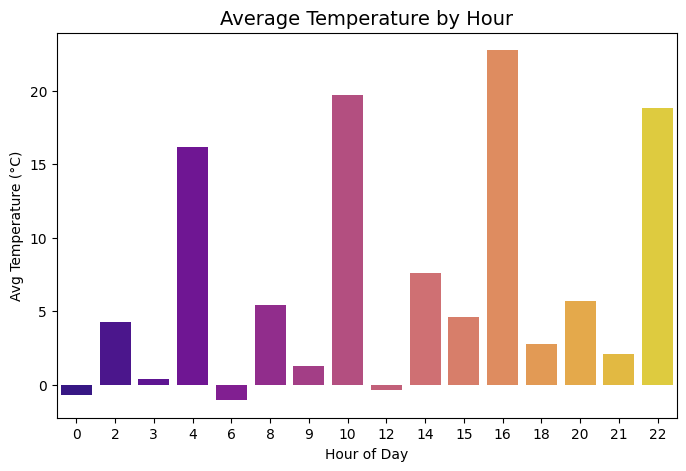

In [32]:
hourly_temp = tempdf.groupby('hour')['temperature'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='hour', y='temperature', data=hourly_temp, palette='plasma')
plt.title('Average Temperature by Hour', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Avg Temperature (°C)')
plt.show()

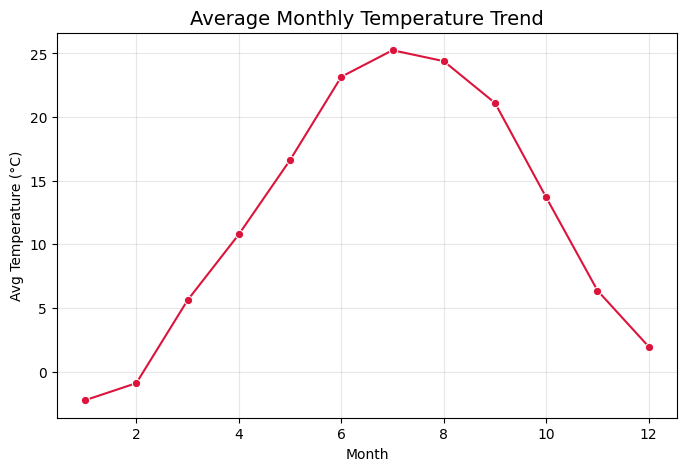

In [33]:
monthly_temp=tempdf.groupby('month')['temperature'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='month', y='temperature', data=monthly_temp, marker='o', color='crimson')
plt.title('Average Monthly Temperature Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Avg Temperature (°C)')
plt.grid(alpha=0.3)
plt.show()

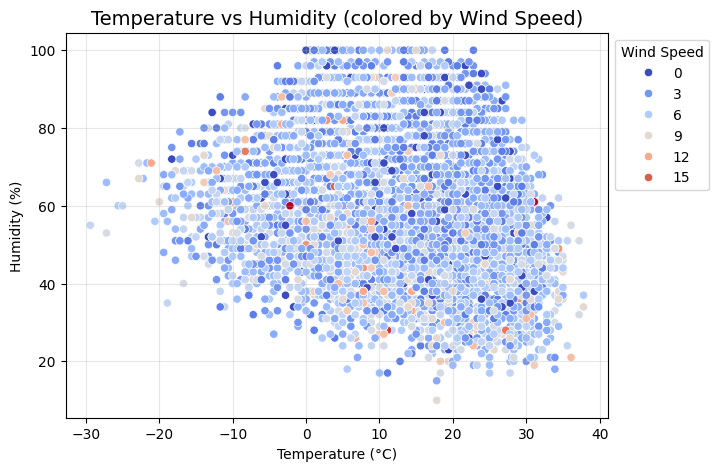

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='temperature', y='humidity', data=tempdf, hue='wind_speed', palette='coolwarm')
plt.title('Temperature vs Humidity (colored by Wind Speed)', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Wind Speed', bbox_to_anchor=(1,1))
plt.grid(alpha=0.3)
plt.show()

# FeATURE ENGINEERING AND PREPROCESSING

In [35]:
weather_df['datetime']=pd.to_datetime(weather_df['datetime'], dayfirst=True)
weather_df.set_index('datetime', inplace=True)
weather_df=weather_df.sort_index()

In [36]:

weather_df['temperature'].interpolate(method='time', inplace=True)
weather_df['humidity'].interpolate(method='time', inplace=True)
weather_df['wind_speed'].fillna(0, inplace=True)

In [37]:
daily_weather = weather_df.resample('D').agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean'
})

In [38]:
# Discomfort Index
daily_weather['DI']=0.5 * (daily_weather['temperature'] + 61 + ((daily_weather['temperature']-68)*1.2) + (daily_weather['humidity']*0.094))
daily_weather

,temperature,humidity,wind_speed,DI
datetime,,,,
2019-01-01,-0.700,86.00,3.75,-7.02800
2019-01-02,-1.125,80.25,4.50,-7.76575
2019-01-03,0.150,75.75,5.50,-6.57475
2019-01-04,3.240,72.40,4.00,-3.33320
2019-01-05,5.580,74.80,3.60,-0.64640
...,...,...,...,...
2025-09-16,23.900,49.50,3.00,18.31650
2025-09-17,23.475,60.00,1.25,18.34250
2025-09-18,24.025,59.00,2.75,18.90050


# DATA MERGING

In [39]:
# Merge daily weather + crime counts
merged_df=daily_df.join(daily_weather, how='left')
merged_df.interpolate(method="time", inplace=True)  # fill missing days

In [40]:
merged_df

,crime_count,Arrest,District,day_of_week,is_weekend,is_holiday,weekday_avg,month_avg,weekend_avg,lag_1,lag_7,temperature,humidity,wind_speed,DI
Date,,,,,,,,,,,,,,,
2019-01-08,12,1,3,1,0,0,2.000000,7.857143,0.000000,12.0,2.0,5.627273,70.454545,7.363636,-0.798636
2019-01-09,10,0,3,2,0,0,9.000000,8.375000,0.000000,12.0,9.0,-5.225000,56.375000,8.125000,-13.397875
2019-01-10,12,3,2,3,0,0,8.000000,8.555556,0.000000,10.0,8.0,-6.985714,62.714286,3.142857,-15.036714
2019-01-11,14,1,2,4,0,0,9.000000,8.900000,0.000000,12.0,9.0,-2.685714,71.000000,2.285714,-9.917286
2019-01-12,7,2,2,5,1,0,9.000000,9.363636,9.000000,14.0,9.0,-1.016667,81.666667,5.000000,-7.580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-16,6,1,2,1,0,0,7.880000,9.056410,0.000000,16.0,7.0,23.900000,49.500000,3.000000,18.316500
2025-09-17,6,0,1,2,0,0,8.114286,9.040816,0.000000,6.0,13.0,23.475000,60.000000,1.250000,18.342500
2025-09-18,5,0,3,3,0,0,8.260000,9.025381,0.000000,6.0,10.0,24.025000,59.000000,2.750000,18.900500


In [41]:
merged_df.nunique()

,0
crime_count,28
Arrest,6
District,5
day_of_week,7
is_weekend,2
is_holiday,2
weekday_avg,2281
month_avg,2123
weekend_avg,681
lag_1,28


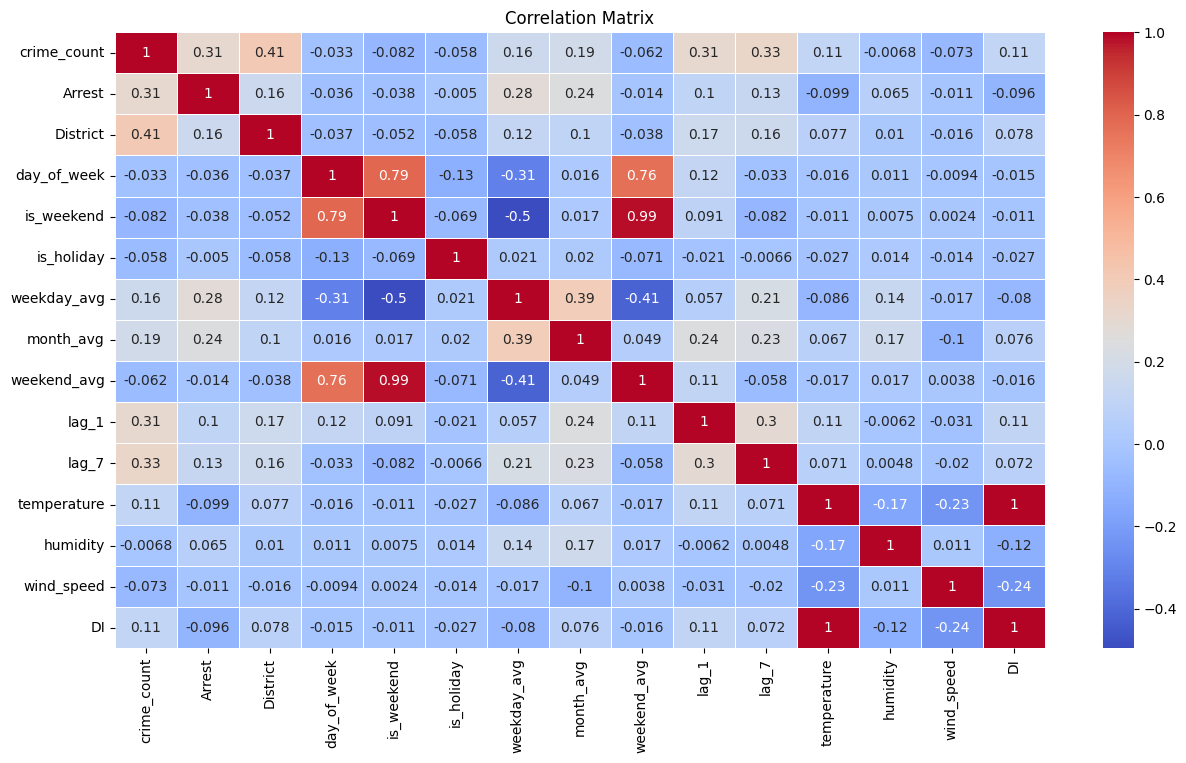

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix
numeric_merged_df=merged_df.select_dtypes(include=np.number)

corr_matrix=numeric_merged_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [43]:
merged_df.columns

Index(['crime_count', 'Arrest', 'District', 'day_of_week', 'is_weekend',
       'is_holiday', 'weekday_avg', 'month_avg', 'weekend_avg', 'lag_1',
       'lag_7', 'temperature', 'humidity', 'wind_speed', 'DI'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler
final_df = merged_df.copy()
# Choose the feature columns you want to feed to models
feature_cols=['crime_count', 'Arrest', 'District', 'day_of_week', 'is_weekend',
       'is_holiday', 'weekday_avg', 'month_avg', 'weekend_avg', 'lag_1',
       'lag_7', 'temperature', 'humidity', 'wind_speed', 'DI']

target_col='crime_count'

# Safety check- ensuring columns exist
for c in feature_cols + [target_col]:
    assert c in merged_df.columns, f"Missing column: {c}"

# Train/test split  BEFORE scaling
n_total=len(daily_df)
split_row=int(0.8 * n_total)
train_df=merged_df.iloc[:split_row].copy()
test_df= merged_df.iloc[split_row:].copy()

# Fit scalers on train only
feature_scaler=StandardScaler().fit(train_df[feature_cols].values)
target_scaler= StandardScaler().fit(train_df[[target_col]].values)

# Apply the scaler to the whole dataset
features_scaled = feature_scaler.transform(merged_df[feature_cols].values)
target_scaled   = target_scaler.transform(merged_df[[target_col]].values)

In [45]:

WINDOW_SIZE = 7
def create_rolling_windows_from_scaled(features_arr, target_arr, window_size=WINDOW_SIZE):
    X, y = [], []
    for i in range(len(features_arr) - window_size):
        X.append(features_arr[i:i+window_size])
        y.append(target_arr[i+window_size])   # next day target
    X= np.array(X)   # (n_samples, window_size, n_features)
    y= np.array(y)   # (n_samples, 1)
    return X, y

X_all, y_all = create_rolling_windows_from_scaled(features_scaled, target_scaled, window_size=WINDOW_SIZE)


In [46]:

n_samples=X_all.shape[0]
split_sample=int(0.8 * n_samples)
X_train, X_test=X_all[:split_sample], X_all[split_sample:]
y_train, y_test= y_all[:split_sample], y_all[split_sample:]

print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1952, 7, 15) X_test.shape: (489, 7, 15)
y_train.shape: (1952, 1) y_test.shape: (489, 1)


In [47]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1)


# LSTM

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Input

model_lstm=Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer specifying time steps and features (1 feature here)
    LSTM(128, activation="relu", return_sequences=False),  # LSTM layer with 128 units, outputs last timestep only
    Dropout(0.7),
     # Flatten layer
    Flatten(),
    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(64, activation="relu"),       # Fully connected hidden layer with 64 neurons and ReLU activation
    Dense(32, activation="relu"),       # Another Dense layer with 32 neurons and ReLU
    Dense(1, activation="linear")       # Output layer with 1 neuron for regression (linear activation)
])


model_lstm.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [49]:
history= model_lstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.1163 - mae: 0.8354 - val_loss: 0.9021 - val_mae: 0.7330 - learning_rate: 0.0010
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9074 - mae: 0.7585 - val_loss: 0.8927 - val_mae: 0.7296 - learning_rate: 0.0010
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0006 - mae: 0.7914 - val_loss: 0.8820 - val_mae: 0.7253 - learning_rate: 0.0010
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0176 - mae: 0.7885 - val_loss: 0.8670 - val_mae: 0.7212 - learning_rate: 0.0010
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.8909 - mae: 0.7522 - val_loss: 0.8989 - val_mae: 0.7313 - learning_rate: 0.0010
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9426 - mae: 0.7644
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.9432 - mae: 0.7645 - val_loss: 0.9151 - val_mae: 0.7367 - learning_rate: 0.0010
Epoch 7/5

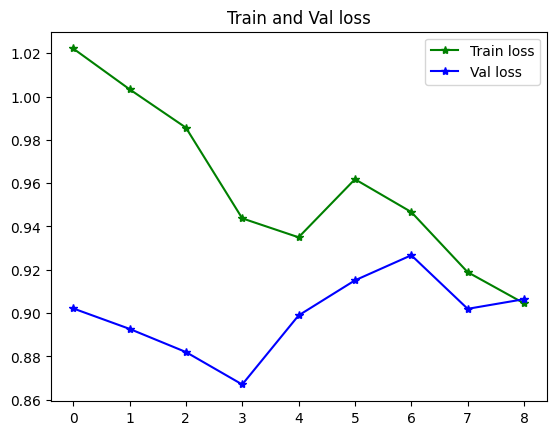

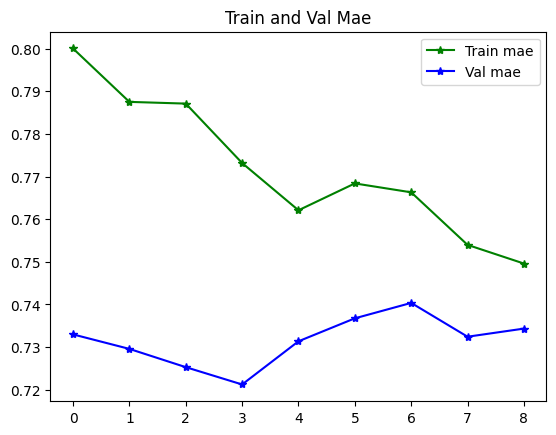

In [50]:
#Train and Validation Accuracy
plt.plot(history.history['loss'], 'g', marker='*', label='Train loss')
plt.plot(history.history['val_loss'], 'b', marker='*', label='Val loss')
plt.title('Train and Val loss')
plt.legend()
plt.figure()
#Train and Validation Loss
plt.plot(history.history['mae'], 'g', marker='*', label='Train mae')
plt.plot(history.history['val_mae'], 'b', marker='*', label='Val mae')
plt.title('Train and Val Mae')
plt.legend()
plt.show()


In [51]:

#   MODEL PERFORMANCE METRICS
start_exec=time.time()

predicted=model_lstm.predict(X_test)

end_exec=time.time()
execution_time=end_exec - start_exec

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared(R2-Score):', metrics.r2_score(y_test, predicted))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predicted))

#   INVERSE TRANSFORM AND DF
predicted_value=target_scaler.inverse_transform(predicted)
real_value = target_scaler.inverse_transform(y_test.reshape(-1, 1))

actualpred_df=pd.DataFrame({
    "Real": real_value.ravel(),
    "Predicted": predicted_value.ravel()
}, index = final_df.index[-len(real_value):])
print(actualpred_df.tail())

#   LATENCY AND THROUGHPUT
start=time.time()
for i in range(min(1000, len(X_test))):
    # Reshape input to include batch dimension
    _ = model_lstm.predict(X_test[i].reshape(1, X_test.shape[1], X_test.shape[2]), verbose=0)
end = time.time()
latency = (end - start) / min(1000, len(X_test))

start = time.time()
_ = model_lstm.predict(X_test)
end = time.time()
throughput = len(X_test) / (end - start)

print(f"\nLatency per prediction: {latency * 1000:.4f} ms")
print(f"Throughput: {throughput:.2f} predictions/sec")

#   EXECUTION TIME AND MEMORY USAGE
print(f"Total Execution Time: {execution_time:.4f} seconds")

process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # in MB
print(f"Memory Usage: {memory_usage:.2f} MB")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error(MSE): 0.8670076083923745
Root Mean Squared Error(RMSE): 0.931132433326417
R-squared(R2-Score): -0.12012900112422598
Mean Absolute Error(MAE): 0.721209802885463
            Real  Predicted
Date                       
2025-09-16   6.0   7.970457
2025-09-17   6.0   8.097261
2025-09-18   5.0   7.978980
2025-09-19   7.0   7.995163
2025-09-20   6.0   7.838106
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Latency per prediction: 73.0619 ms
Throughput: 2427.57 predictions/sec
Total Execution Time: 0.4458 seconds
Memory Usage: 1526.64 MB


In [52]:
import plotly.express as px
fig= px.line(actualpred_df.reset_index(), x=actualpred_df.index, y=actualpred_df.columns, title='Actual vs Predicted CPU usage [MHZ]')
fig.show()

# BiLSTM

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Bidirectional, Input, Permute, Multiply, Flatten
from tensorflow.keras import Model

# Build the Bidirectional LSTM model
model_bilstm = Sequential([
    Bidirectional(LSTM(units=128, return_sequences=True,
                             input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.7),

    # Second LSTM layer
    Bidirectional(LSTM(units=64, return_sequences=False)),
    Dropout(0.7),

    # Flatten layer
    Flatten(),

    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(64, activation='relu'),
    Dropout(0.7),

    # Output layer
    Dense(1)
])

model_bilstm.build(input_shape=(None, X_train.shape[1], X_train.shape[2]))
model_bilstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 7, 256)         │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324,289 (1.24 MB)

 Trainable params: 324,289 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Model compilation
model_bilstm.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [55]:
# Training
history=model_bilstm.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 1.1785 - mae: 0.8366 - val_loss: 0.8069 - val_mae: 0.6975 - learning_rate: 0.0010
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.9459 - mae: 0.7627 - val_loss: 0.7863 - val_mae: 0.6922 - learning_rate: 0.0010
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.8769 - mae: 0.7347 - val_loss: 0.7637 - val_mae: 0.6866 - learning_rate: 0.0010
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.9022 - mae: 0.7448 - val_loss: 0.7589 - val_mae: 0.6834 - learning_rate: 0.0010
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.9852 - mae: 0.7673 - val_loss: 0.7803 - val_mae: 0.6895 - learning_rate: 0.0010
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.8974 - mae: 0.7304
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.8975 - mae: 0.7307 - val_loss: 0.7922 - val_mae: 0.6925 - learning_rate: 0.0010
Epoch 7/5

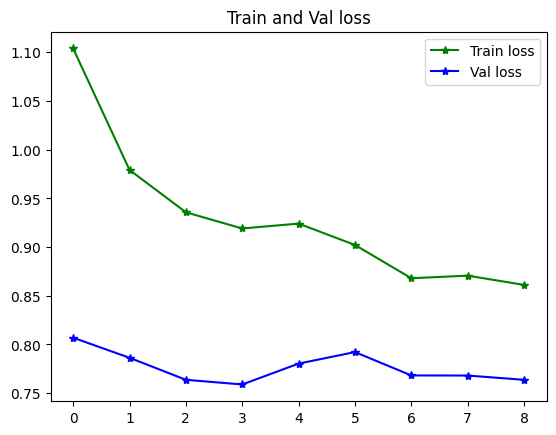

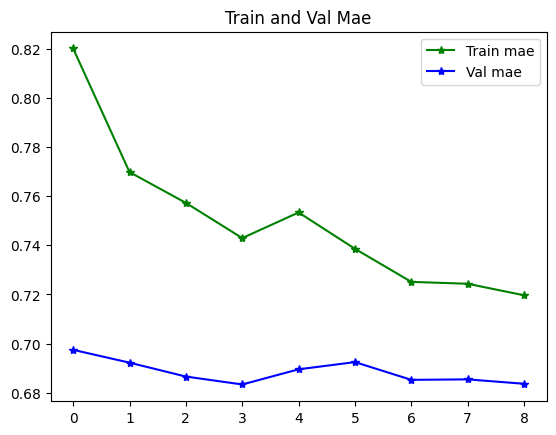

In [56]:
#Train and Validation Accuracy
plt.plot(history.history['loss'], 'g', marker='*', label='Train loss')
plt.plot(history.history['val_loss'], 'b', marker='*', label='Val loss')
plt.title('Train and Val loss')
plt.legend()
plt.figure()
#Train and Validation Loss
plt.plot(history.history['mae'], 'g', marker='*', label='Train mae')
plt.plot(history.history['val_mae'], 'b', marker='*', label='Val mae')
plt.title('Train and Val Mae')
plt.legend()
plt.show()


In [57]:

#   MODEL PERFORMANCE METRICS
start_exec=time.time()

predicted=model_bilstm.predict(X_test)

end_exec=time.time()
execution_time=end_exec - start_exec

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared(R2-Score):', metrics.r2_score(y_test, predicted))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predicted))

#   INVERSE TRANSFORM AND DF
predicted_value=target_scaler.inverse_transform(predicted)
real_value=target_scaler.inverse_transform(y_test.reshape(-1, 1))

actualpred_df=pd.DataFrame({
    "Real": real_value.ravel(),
    "Predicted": predicted_value.ravel()
}, index = final_df.index[-len(real_value):])
print(actualpred_df.tail())

#   LATENCY AND THROUGHPUT
start=time.time()
for i in range(min(1000, len(X_test))):
    # Reshape input to include batch dimension
    _ = model_bilstm.predict(X_test[i].reshape(1, X_test.shape[1], X_test.shape[2]), verbose=0)
end = time.time()
latency = (end - start) / min(1000, len(X_test))

start = time.time()
_ = model_bilstm.predict(X_test)
end = time.time()
throughput = len(X_test) / (end - start)

print(f"\nLatency per prediction: {latency * 1000:.4f} ms")
print(f"Throughput: {throughput:.2f} predictions/sec")

#   EXECUTION TIME AND MEMORY USAGE
print(f"Total Execution Time: {execution_time:.4f} seconds")

process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # in MB
print(f"Memory Usage: {memory_usage:.2f} MB")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
Mean Squared Error(MSE): 0.7589273337822018
Root Mean Squared Error(RMSE): 0.871164355206411
R-squared(R2-Score): 0.019505125345326113
Mean Absolute Error(MAE): 0.6833727730381941
            Real  Predicted
Date                       
2025-09-16   6.0   8.184720
2025-09-17   6.0   8.365575
2025-09-18   5.0   8.456881
2025-09-19   7.0   8.258128
2025-09-20   6.0   8.037788
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Latency per prediction: 80.0702 ms
Throughput: 1266.13 predictions/sec
Total Execution Time: 1.7427 seconds
Memory Usage: 1677.76 MB


In [58]:
import plotly.express as px
fig = px.line(actualpred_df.reset_index(), x=actualpred_df.index, y=actualpred_df.columns, title='Actual vs Predicted CPU usage [MHZ]')
fig.show()

# Bidirectional GRU

In [59]:

# Model 2: GRU (Bidirectional)
from tensorflow.keras.layers import GRU

def build_gru_model(window_size, n_features):
    model=Sequential()
    model.add(Bidirectional(GRU(64, return_sequences=True), input_shape=(window_size, n_features)))
    model.add(Dropout(0.3))
    model.add(Bidirectional(GRU(64, return_sequences=False)))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model_gru=build_gru_model(WINDOW_SIZE, X_train.shape[2])
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 7, 128)         │        31,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,729 (413.00 KB)

 Trainable params: 105,729 (413.00 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Training
history=model_gru.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.9301 - mae: 0.7363 - val_loss: 0.7456 - val_mae: 0.6911 - learning_rate: 0.0010
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.7638 - mae: 0.6746 - val_loss: 0.7296 - val_mae: 0.6911 - learning_rate: 0.0010
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.7017 - mae: 0.6397 - val_loss: 0.7509 - val_mae: 0.6995 - learning_rate: 0.0010
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.7079 - mae: 0.6600 - val_loss: 0.7288 - val_mae: 0.6870 - learning_rate: 0.0010
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.7139 - mae: 0.6566 - val_loss: 0.7358 - val_mae: 0.6908 - learning_rate: 0.0010
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.7147 - mae: 0.6487 - val_loss: 0.7269 - val_mae: 0.6895 - learning_rate: 0.0010
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.7134 - mae: 0.6447 - val_loss: 0.7356 - val_mae: 0.6886 - learning_rate: 0.0010
Epoch 8/20
30

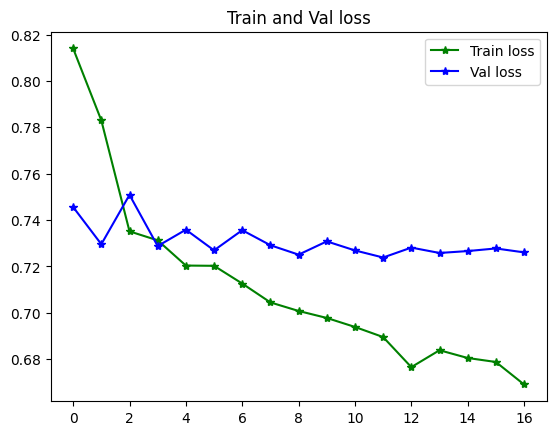

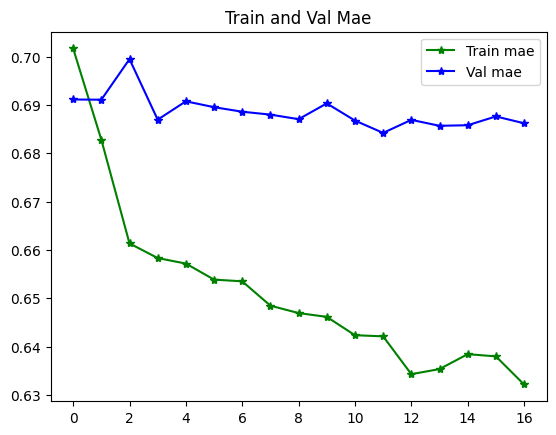

In [61]:
#Train and Validation Accuracy
plt.plot(history.history['loss'], 'g', marker='*', label='Train loss')
plt.plot(history.history['val_loss'], 'b', marker='*', label='Val loss')
plt.title('Train and Val loss')
plt.legend()
plt.figure()
#Train and Validation Loss
plt.plot(history.history['mae'], 'g', marker='*', label='Train mae')
plt.plot(history.history['val_mae'], 'b', marker='*', label='Val mae')
plt.title('Train and Val Mae')
plt.legend()
plt.show()


In [62]:

#   MODEL PERFORMANCE METRICS
start_exec=time.time()

predicted=model_gru.predict(X_test)

end_exec=time.time()
execution_time=end_exec - start_exec

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared(R2-Score):', metrics.r2_score(y_test, predicted))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predicted))

#   INVERSE TRANSFORM AND DF
predicted_value=target_scaler.inverse_transform(predicted)
real_value=target_scaler.inverse_transform(y_test.reshape(-1, 1))

actualpred_df=pd.DataFrame({
    "Real": real_value.ravel(),
    "Predicted": predicted_value.ravel()
}, index = final_df.index[-len(real_value):])
print(actualpred_df.tail())

#   LATENCY AND THROUGHPUT
start = time.time()
for i in range(min(1000, len(X_test))):
    # Reshape input to include batch dimension
    _ = model_gru.predict(X_test[i].reshape(1, X_test.shape[1], X_test.shape[2]), verbose=0)
end = time.time()
latency = (end - start) / min(1000, len(X_test))

start = time.time()
_ = model_gru.predict(X_test)
end = time.time()
throughput = len(X_test) / (end - start)

print(f"\nLatency per prediction: {latency * 1000:.4f} ms")
print(f"Throughput: {throughput:.2f} predictions/sec")

#   EXECUTION TIME AND MEMORY USAGE
print(f"Total Execution Time: {execution_time:.4f} seconds")

process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # in MB
print(f"Memory Usage: {memory_usage:.2f} MB")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Mean Squared Error(MSE): 0.7238382158773947
Root Mean Squared Error(RMSE): 0.8507868216406473
R-squared(R2-Score): 0.06483845138374544
Mean Absolute Error(MAE): 0.6842200230187757
            Real  Predicted
Date                       
2025-09-16   6.0   9.499536
2025-09-17   6.0   9.872103
2025-09-18   5.0   9.874287
2025-09-19   7.0   9.521463
2025-09-20   6.0   8.660919
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Latency per prediction: 82.0088 ms
Throughput: 3145.62 predictions/sec
Total Execution Time: 1.4286 seconds
Memory Usage: 1801.35 MB


In [63]:
import plotly.express as px
fig=px.line(actualpred_df.reset_index(), x=actualpred_df.index, y=actualpred_df.columns, title='Actual vs Predicted CPU usage [MHZ]')
fig.show()

# BILSTM WITH ATTENTION

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Bidirectional, Input, Permute, Multiply, Flatten
from tensorflow.keras import Model
from tensorflow.keras import backend as K
import tensorflow as tf
def cross_attention_layers(inputs, single_attention_vector=False):
    time_steps=K.int_shape(inputs)[1]
    input_dim=K.int_shape(inputs)[2]
    a=Permute((2, 1))(inputs)
    a=Dense(time_steps, activation='softmax')(a)
    if single_attention_vector:
        a = Lambda(lambda x: K.mean(x, axis=1))(a)
        a = RepeatVector(input_dim)(a)

    a_probs = Permute((2, 1))(a)
    # element-wise
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

In [65]:
# Model input shape
INPUT_DIMS=X_train.shape[1]
TIME_STEPS=1
lstm_units= 128

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
# First LSTM layer
x= Bidirectional(LSTM(lstm_units, return_sequences=True))(inputs)
x= Dropout(0.3)(x)
# Second LSTM layer
x= Bidirectional(LSTM(lstm_units, return_sequences=True))(x)
x= Dropout(0.3)(x)
# Attention layer
attention_mul = cross_attention_layers(x)
attention_mul = Flatten()(attention_mul)
# Output layer
output= Dense(1)(attention_mul)

# Define the model
model_attn= Model(inputs=[inputs], outputs=output)

In [66]:
# Model compilation
model_attn.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [67]:
# Training
history = model_attn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.8299 - mae: 0.7205 - val_loss: 0.7213 - val_mae: 0.6736 - learning_rate: 0.0010
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.7758 - mae: 0.6729 - val_loss: 0.7174 - val_mae: 0.6783 - learning_rate: 0.0010
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.7333 - mae: 0.6505 - val_loss: 0.7233 - val_mae: 0.6824 - learning_rate: 0.0010
Epoch 4/20
30/31 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6404 - mae: 0.6336
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.6446 - mae: 0.6345 - val_loss: 0.7179 - val_mae: 0.6767 - learning_rate: 0.0010
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.6990 - mae: 0.6490 - val_loss: 0.7383 - val_mae: 0.6926 - learning_rate: 5.0000e-04
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.6653 - mae: 0.6349
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00025000

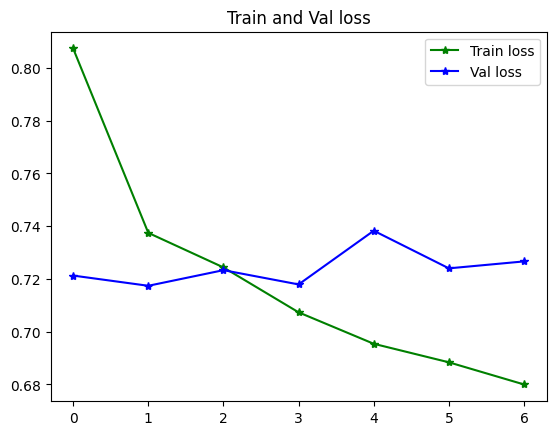

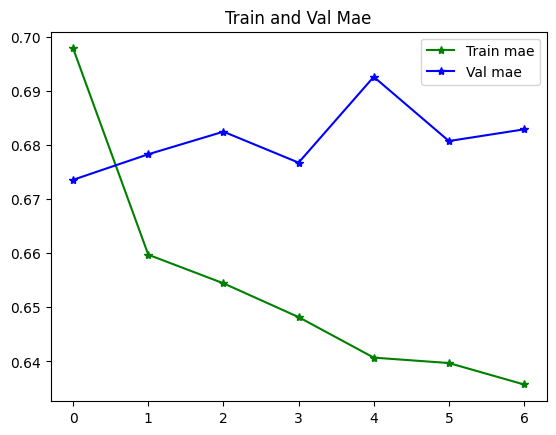

In [68]:
#Train and Validation Accuracy
plt.plot(history.history['loss'], 'g', marker='*', label='Train loss')
plt.plot(history.history['val_loss'], 'b', marker='*', label='Val loss')
plt.title('Train and Val loss')
plt.legend()
plt.figure()
#Train and Validation Loss
plt.plot(history.history['mae'], 'g', marker='*', label='Train mae')
plt.plot(history.history['val_mae'], 'b', marker='*', label='Val mae')
plt.title('Train and Val Mae')
plt.legend()
plt.show()


In [69]:
#   MODEL PERFORMANCE METRICS
start_exec= time.time()

predicted= model_attn.predict(X_test)

end_exec= time.time()
execution_time= end_exec - start_exec

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared(R2-Score):', metrics.r2_score(y_test, predicted))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predicted))

#   INVERSE TRANSFORM AND DF
predicted_value= target_scaler.inverse_transform(predicted)
real_value= target_scaler.inverse_transform(y_test.reshape(-1, 1))

actualpred_df= pd.DataFrame({
    "Real": real_value.ravel(),
    "Predicted": predicted_value.ravel()
}, index = final_df.index[-len(real_value):])
print(actualpred_df.tail())

#   LATENCY AND THROUGHPUT
start = time.time()
for i in range(min(1000, len(X_test))):
    # Reshape input to include batch dimension
    _ = model_attn.predict(X_test[i].reshape(1, X_test.shape[1], X_test.shape[2]), verbose=0)
end = time.time()
latency = (end - start) / min(1000, len(X_test))

start = time.time()
_ = model_attn.predict(X_test)
end = time.time()
throughput = len(X_test) / (end - start)

print(f"\nLatency per prediction: {latency * 1000:.4f} ms")
print(f"Throughput: {throughput:.2f} predictions/sec")

#   EXECUTION TIME AND MEMORY USAGE
print(f"Total Execution Time: {execution_time:.4f} seconds")

process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # in MB
print(f"Memory Usage: {memory_usage:.2f} MB")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Mean Squared Error(MSE): 0.7173849585293188
Root Mean Squared Error(RMSE): 0.8469858077496452
R-squared(R2-Score): 0.07317572620962742
Mean Absolute Error(MAE): 0.678273100439007
            Real  Predicted
Date                       
2025-09-16   6.0   9.521104
2025-09-17   6.0  10.141519
2025-09-18   5.0  10.407090
2025-09-19   7.0  10.085607
2025-09-20   6.0   9.485859
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Latency per prediction: 79.4225 ms
Throughput: 1812.61 predictions/sec
Total Execution Time: 1.3148 seconds
Memory Usage: 1926.59 MB


In [70]:
import plotly.express as px
fig = px.line(actualpred_df.reset_index(), x=actualpred_df.index, y=actualpred_df.columns, title='Actual vs Predicted CPU usage [MHZ]')
fig.show()

# INFORMER NETWORK + CBAM

In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K

# CBAM MODULE
class CBAM(layers.Layer):
    def __init__(self, reduction_ratio=8):
        super(CBAM, self).__init__()
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        self.channel_axis = -1
        self.channel = input_shape[self.channel_axis]

        # Channel attention MLP
        self.shared_dense_one = layers.Dense(self.channel // self.reduction_ratio,
                                             activation='relu',
                                             kernel_initializer='he_normal',
                                             use_bias=True)
        self.shared_dense_two = layers.Dense(self.channel,
                                             kernel_initializer='he_normal',
                                             use_bias=True)

        # Spatial attention
        self.spatial_conv = layers.Conv1D(filters=1,
                                          kernel_size=7,
                                          padding='same',
                                          activation='sigmoid')

    def call(self, inputs):
        # Channel Attention
        avg_pool = K.mean(inputs, axis=1, keepdims=True)
        max_pool = K.max(inputs, axis=1, keepdims=True)
        avg_out = self.shared_dense_two(self.shared_dense_one(avg_pool))
        max_out = self.shared_dense_two(self.shared_dense_one(max_pool))
        channel_attention = tf.nn.sigmoid(avg_out + max_out)
        x = inputs * channel_attention

        # Spatial Attention
        avg_pool_spatial = tf.reduce_mean(x, axis=-1, keepdims=True)
        max_pool_spatial = tf.reduce_max(x, axis=-1, keepdims=True)
        concat = tf.concat([avg_pool_spatial, max_pool_spatial], axis=-1)
        spatial_attention = self.spatial_conv(concat)

        return x * spatial_attention


# INFORMER ATTENTION FIXED VERSION

class InformerAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, dropout=0.1, top_k_ratio=0.2):
        super(InformerAttention, self).__init__()
        self.num_heads= num_heads
        self.embed_dim= embed_dim
        self.top_k_ratio= top_k_ratio
        self.mha= layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dropout= layers.Dropout(dropout)
        self.layernorm= layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs, training=False):
        # Attention output + scores
        attn_output, attn_scores = self.mha(inputs, inputs, return_attention_scores=True)

        seq_len=tf.cast(tf.shape(attn_scores)[-1], tf.float32)
        k = tf.cast(tf.maximum(1.0, tf.round(self.top_k_ratio * seq_len)), tf.int32)

        # top-k selection over attention weights
        top_k_values, _ = tf.math.top_k(attn_scores, k=k)
        threshold = tf.reduce_min(top_k_values)
        sparse_mask = tf.cast(attn_scores >= threshold, tf.float32)

        # Mask the attention scores directly
        masked_scores=attn_scores * sparse_mask

        # Renormalize after masking
        masked_scores=masked_scores / (tf.reduce_sum(masked_scores, axis=-1, keepdims=True) + 1e-9)

        # Compute new attention output manually
        v=inputs
        v_tiled=tf.expand_dims(v, 1)
        weighted_v=tf.matmul(masked_scores, v_tiled)
        weighted_v=tf.reduce_mean(weighted_v, axis=1)

        # Add & Norm
        out=self.layernorm(inputs + self.dropout(weighted_v, training=training))
        return out


# BILSTM + CBAM + INFORMER MODEL
def build_bilstm_cbam_informer(input_shape, lstm_units=64, embed_dim=64, num_heads=4, forecast_horizon=1):
    inputs = layers.Input(shape=input_shape)

    # BiLSTM Encoder
    x= layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))(inputs)
    x= layers.Dropout(0.2)(x)
    x= layers.Bidirectional(layers.LSTM(lstm_units // 2, return_sequences=True))(x)

    # CBAM
    x= CBAM()(x)

    # Informer Attention
    x= InformerAttention(embed_dim=embed_dim, num_heads=num_heads)(x)

    # Feed Forward
    x= layers.GlobalAveragePooling1D()(x)
    x= layers.Dense(128, activation='relu')(x)
    x= layers.Dropout(0.2)(x)
    outputs= layers.Dense(forecast_horizon, activation='linear')(x)

    model_info= models.Model(inputs, outputs)
    model_info.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model_info

# Example Usage
input_shape= (X_train.shape[1], X_train.shape[2])
model_info= build_bilstm_cbam_informer(input_shape)
model_info.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 7, 15)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 7, 128)         │        40,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 7, 64)          │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cbam_1 (CBAM)                   │ (None, 7, 64)          │         1,111 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ informer_attention_1            │ (None, 7, 64)          │        66,496 │
│ (InformerAttention)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,232 (618.09 KB)

 Trainable params: 158,232 (618.09 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Model compilation
model_info.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [74]:
# Training
history=model_info.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - loss: 1.1427 - mae: 0.8192 - val_loss: 0.7712 - val_mae: 0.7071 - learning_rate: 0.0010
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.8399 - mae: 0.7142 - val_loss: 0.7899 - val_mae: 0.6963 - learning_rate: 0.0010
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.7453 - mae: 0.6694 - val_loss: 0.7590 - val_mae: 0.6963 - learning_rate: 0.0010
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.7511 - mae: 0.6779 - val_loss: 0.7285 - val_mae: 0.6853 - learning_rate: 0.0010
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.6847 - mae: 0.6438 - val_loss: 0.7688 - val_mae: 0.7060 - learning_rate: 0.0010
Epoch 6/20
29/31 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6895 - mae: 0.6347
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.6901 - mae: 0.6354 - val_loss: 0.7495 - val_mae: 0.7013 - learning_rate: 0.0010
Epoch 7/

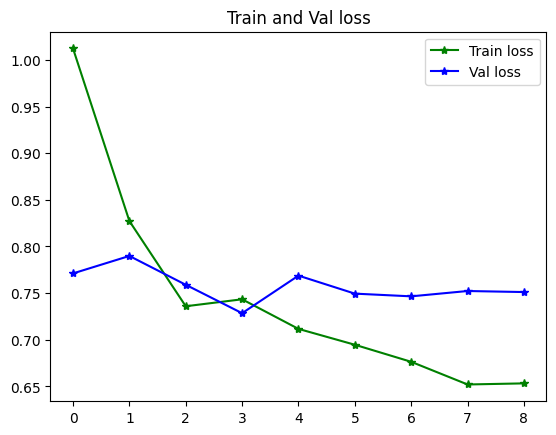

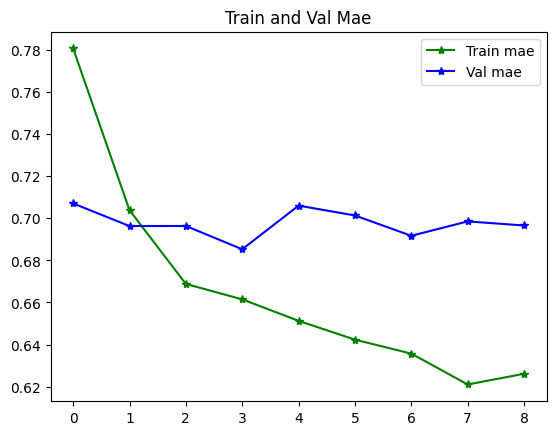

In [75]:
#Train and Validation Accuracy
plt.plot(history.history['loss'], 'g', marker='*', label='Train loss')
plt.plot(history.history['val_loss'], 'b', marker='*', label='Val loss')
plt.title('Train and Val loss')
plt.legend()
plt.figure()
#Train and Validation Loss
plt.plot(history.history['mae'], 'g', marker='*', label='Train mae')
plt.plot(history.history['val_mae'], 'b', marker='*', label='Val mae')
plt.title('Train and Val Mae')
plt.legend()
plt.show()


In [76]:
#   MODEL PERFORMANCE METRICS
start_exec=time.time()

predicted=model_info.predict(X_test)

end_exec=time.time()
execution_time=end_exec - start_exec

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared(R2-Score):', metrics.r2_score(y_test, predicted))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predicted))

#   INVERSE TRANSFORM AND DF
predicted_value=target_scaler.inverse_transform(predicted)
real_value=target_scaler.inverse_transform(y_test.reshape(-1, 1))

actualpred_df=pd.DataFrame({
    "Real": real_value.ravel(),
    "Predicted": predicted_value.ravel()
}, index = final_df.index[-len(real_value):])
print(actualpred_df.tail())

#   LATENCY AND THROUGHPUT
start = time.time()
for i in range(min(1000, len(X_test))):
    # Reshape input to include batch dimension
    _ = model_info.predict(X_test[i].reshape(1, X_test.shape[1], X_test.shape[2]), verbose=0)
end = time.time()
latency = (end - start) / min(1000, len(X_test))

start = time.time()
_ = model_info.predict(X_test)
end = time.time()
throughput = len(X_test) / (end - start)

print(f"\nLatency per prediction: {latency * 1000:.4f} ms")
print(f"Throughput: {throughput:.2f} predictions/sec")

#   EXECUTION TIME AND MEMORY USAGE
print(f"Total Execution Time: {execution_time:.4f} seconds")

process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # in MB
print(f"Memory Usage: {memory_usage:.2f} MB")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Mean Squared Error(MSE): 0.7287555641142865
Root Mean Squared Error(RMSE): 0.8536718128849555
R-squared(R2-Score): 0.05848549171481854
Mean Absolute Error(MAE): 0.6854087926385434
            Real  Predicted
Date                       
2025-09-16   6.0   9.145470
2025-09-17   6.0   9.671824
2025-09-18   5.0  10.264104
2025-09-19   7.0   9.992565
2025-09-20   6.0   9.838469
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Latency per prediction: 76.9121 ms
Throughput: 2943.73 predictions/sec
Total Execution Time: 1.4582 seconds
Memory Usage: 2085.04 MB


In [77]:
import plotly.express as px
fig= px.line(actualpred_df.reset_index(), x=actualpred_df.index, y=actualpred_df.columns, title='Actual vs Predicted CPU usage [MHZ]')
fig.show()

# Spatio Temporal CBAM ATTENTION

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Flatten, GlobalAveragePooling1D, GlobalMaxPooling1D, Reshape, Conv1D, Add, Activation, Multiply, Lambda, Concatenate
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# CBAM Block
def cbam_block(x, ratio=8):
    #CHANNEL ATTENTION
    channel= x.shape[-1]
    shared_dense_one= Dense(channel // ratio, activation='relu', use_bias=False)
    shared_dense_two= Dense(channel, activation='sigmoid', use_bias=False)

    avg_pool=GlobalAveragePooling1D()(x)
    avg_pool=Reshape((1, channel))(avg_pool)
    avg_pool=shared_dense_one(avg_pool)
    avg_pool=shared_dense_two(avg_pool)

    max_pool=GlobalMaxPooling1D()(x)
    max_pool=Reshape((1, channel))(max_pool)
    max_pool=shared_dense_one(max_pool)
    max_pool=shared_dense_two(max_pool)

    channel_attention=Add()([avg_pool, max_pool])
    channel_attention=Activation('sigmoid')(channel_attention)
    x=Multiply()([x, channel_attention])

    # SPATIAL ATTENTION
    avg_pool = Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(x)
    max_pool = Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(x)
    # Use Keras Concatenate layer instead of tf.concat
    concat=Concatenate(axis=-1)([avg_pool, max_pool])
    spatial_attention=Conv1D(filters=1, kernel_size=7, padding='same', activation='sigmoid')(concat)
    x=Multiply()([x, spatial_attention])

    return x

# MODEL WITH CBAM
inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2]))

x=Bidirectional(LSTM(128, return_sequences=True))(inputs)
x=Dropout(0.7)(x)

x=Bidirectional(LSTM(128, return_sequences=True))(x)
x=Dropout(0.7)(x)

x=Bidirectional(LSTM(64, return_sequences=True))(x)
x=Dropout(0.7)(x)

x=Bidirectional(LSTM(64, return_sequences=True))(x)
x=Dropout(0.7)(x)

# Insert CBAM before flatten/dense
x=cbam_block(x)

x=Flatten()(x)

x=Dense(64, activation='relu')(x)
x=Dropout(0.7)(x)
x=Dense(64, activation='relu')(x)
x=Dropout(0.7)(x)

outputs = Dense(1)(x)

model_cbam = Model(inputs, outputs)
model_cbam.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 7, 15)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_10    │ (None, 7, 256)    │    147,456 │ input_layer_6[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 7, 256)    │          0 │ bidirectional_10… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_11    │ (None, 7, 256)    │    394,240 │ dropout_19[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 7, 256)    │          0 │ bidirectional_11… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_12    │ (None, 7, 128)    │    164,352 │ dropout_20[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 7, 128)    │          0 │ bidirectional_12… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_13    │ (None, 7, 128)    │     98,816 │ dropout_21[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 7, 128)    │          0 │ bidirectional_13… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ dropout_22[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ dropout_22[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 128)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 128)    │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1, 16)     │      2,048 │ reshape[0][0],    │
│                     │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1, 128)    │      2,048 │ dense_19[0][0],   │
│                     │                   │            │ dense_19[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 128)    │          0 │ dense_20[0][0],   │
│                     │                   │            │ dense_20[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1, 128)    │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 870,608 (3.32 MB)

 Trainable params: 870,608 (3.32 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Model compilation
model_cbam.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [80]:
# Training
history = model_cbam.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - loss: 0.9626 - mae: 0.7840 - val_loss: 0.8082 - val_mae: 0.6969 - learning_rate: 0.0010
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.8858 - mae: 0.7357 - val_loss: 0.7611 - val_mae: 0.6841 - learning_rate: 0.0010
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - loss: 0.8891 - mae: 0.7406 - val_loss: 0.7370 - val_mae: 0.6755 - learning_rate: 0.0010
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.8602 - mae: 0.7321 - val_loss: 0.7569 - val_mae: 0.6813 - learning_rate: 0.0010
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.7870 - mae: 0.6841 - val_loss: 0.7207 - val_mae: 0.6753 - learning_rate: 0.0010
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.8308 - mae: 0.6995 - val_loss: 0.7379 - val_mae: 0.6782 - learning_rate: 0.0010
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.8294 - mae: 0.7141
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00050000002374

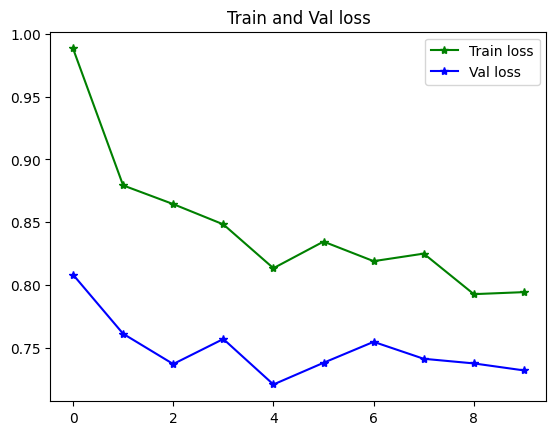

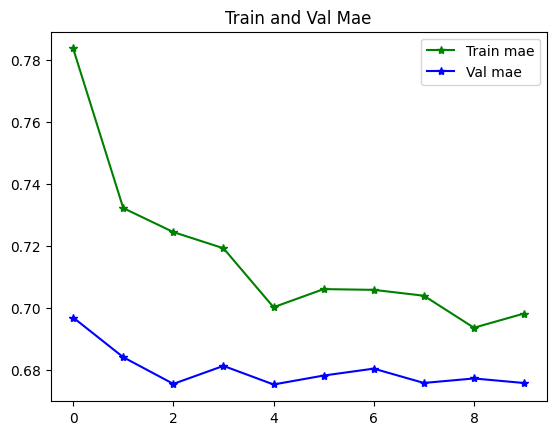

In [81]:
#Train and Validation Accuracy
plt.plot(history.history['loss'], 'g', marker='*', label='Train loss')
plt.plot(history.history['val_loss'], 'b', marker='*', label='Val loss')
plt.title('Train and Val loss')
plt.legend()
plt.figure()
#Train and Validation Loss
plt.plot(history.history['mae'], 'g', marker='*', label='Train mae')
plt.plot(history.history['val_mae'], 'b', marker='*', label='Val mae')
plt.title('Train and Val Mae')
plt.legend()
plt.show()


In [83]:
#   MODEL PERFORMANCE METRICS
start_exec= time.time()

predicted= model_cbam.predict(X_test)

end_exec = time.time()
execution_time = end_exec - start_exec

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared(R2-Score):', metrics.r2_score(y_test, predicted))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predicted))

#   INVERSE TRANSFORM AND DF
predicted_value = target_scaler.inverse_transform(predicted)
real_value = target_scaler.inverse_transform(y_test.reshape(-1, 1))

actualpred_df = pd.DataFrame({
    "Real": real_value.ravel(),
    "Predicted": predicted_value.ravel()
}, index = final_df.index[-len(real_value):])
print(actualpred_df.tail())

#   LATENCY AND THROUGHPUT
start = time.time()
for i in range(min(1000, len(X_test))):
    # Reshape input to include batch dimension
    _ = model_cbam.predict(X_test[i].reshape(1, X_test.shape[1], X_test.shape[2]), verbose=0)
end = time.time()
latency = (end - start) / min(1000, len(X_test))

start = time.time()
_ = model_cbam.predict(X_test)
end = time.time()
throughput = len(X_test) / (end - start)

print(f"\nLatency per prediction: {latency * 1000:.4f} ms")
print(f"Throughput: {throughput:.2f} predictions/sec")


#   EXECUTION TIME AND MEMORY USAGE
print(f"Total Execution Time: {execution_time:.4f} seconds")

process = psutil.Process(os.getpid())
memory_usage = process.memory_info().rss / (1024 ** 2)  # in MB
print(f"Memory Usage: {memory_usage:.2f} MB")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step
Mean Squared Error(MSE): 0.7206637840646761
Root Mean Squared Error(RMSE): 0.8489191858267052
R-squared(R2-Score): 0.06893965315071804
Mean Absolute Error(MAE): 0.6753185986335122
            Real  Predicted
Date                       
2025-09-16   6.0   8.857234
2025-09-17   6.0   9.179479
2025-09-18   5.0   9.368634
2025-09-19   7.0   9.093336
2025-09-20   6.0   8.736243
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Latency per prediction: 82.4497 ms
Throughput: 1369.15 predictions/sec
Total Execution Time: 2.5993 seconds
Memory Usage: 2306.84 MB


In [84]:
import plotly.express as px
fig = px.line(actualpred_df.reset_index(), x=actualpred_df.index, y=actualpred_df.columns, title='Actual vs Predicted CPU usage [MHZ]')
fig.show()

# FORECASTING

In [85]:
from datetime import timedelta

last_window = features_scaled[-WINDOW_SIZE:].copy()

future_predictions = []
future_dates = []

# Get the last date in your data
last_date= merged_df.index[-1]

# Iteratively predict next 7 days
current_window = last_window.copy()

for i in range(7):
    # Predict next day
    pred_scaled = model_cbam.predict(current_window[np.newaxis, :, :],verbose=0)

    # Save prediction
    future_pred= target_scaler.inverse_transform(pred_scaled)[0][0]
    future_predictions.append(future_pred)

    # Create new date
    next_date= last_date + timedelta(days=i+1)
    future_dates.append(next_date)

    # Update window for next prediction:
    next_features =current_window[-1].copy()
    next_features[feature_cols.index('crime_count')] = pred_scaled

    # Append and roll window
    current_window =np.vstack([current_window[1:], next_features])

# Create forecast dataframe
forecast_df= pd.DataFrame({
    'Date': future_dates,
    'Predicted_Crime_Count': future_predictions
})
forecast_df.set_index('Date', inplace=True)

print("\n 7-Day Crime Forecast:")
forecast_df


 7-Day Crime Forecast:


,Predicted_Crime_Count
Date,
2025-09-21,8.167377
2025-09-22,7.585124
2025-09-23,7.381063
2025-09-24,7.632448
2025-09-25,8.059316
2025-09-26,8.461576
2025-09-27,8.731349


In [86]:
import plotly.express as px

fig = px.line(forecast_df.reset_index(), x='Date', y='Predicted_Crime_Count', title='7-Day Crime Forecast')
fig.show()

In [87]:
# Get the last 20 records from the original merged_df
last_20_actual = merged_df['crime_count'].tail(20).reset_index()
last_20_actual.columns = ['Date', 'Crime_Count']
last_20_actual['Type'] = 'Actual'

# Prepare the forecasted data
forecast_df_plot = forecast_df.reset_index()
forecast_df_plot.columns = ['Date', 'Crime_Count']
forecast_df_plot['Type'] = 'Forecast'

# Combine the dataframes
combined_df = pd.concat([last_20_actual, forecast_df_plot])

fig = px.line(combined_df, x='Date', y='Crime_Count', color='Type',
              title='Last 20 Actual Crime Counts and 7-Day Forecast')
fig.show()


Top LIME explanation (feature, weight):
        feature    weight
crime_count_t-4  0.045467
      lag_7_t-6  0.043586
crime_count_t-5  0.042704
crime_count_t-6  0.040726
      lag_7_t-7  0.040333
      lag_7_t-3  0.040233
crime_count_t-3  0.039751
      lag_7_t-2  0.039734
crime_count_t-2  0.038954
      lag_1_t-5  0.037305
      lag_1_t-4  0.031959
weekday_avg_t-1 -0.030416
weekend_avg_t-6  0.022579
weekend_avg_t-7  0.021102
   District_t-2 -0.020543
   District_t-3 -0.016372
day_of_week_t-6  0.015596
 is_weekend_t-6  0.013476
 is_weekend_t-7  0.012642
     Arrest_t-5 -0.008909

Corresponding instance values (unscaled) for explained features (first 30 shown):
        feature    scaled      original
crime_count_t-7 -0.195757  7.000000e+00
     Arrest_t-7 -0.647374  1.936085e-08
   District_t-7 -0.012302  2.000000e+00
day_of_week_t-7  1.000639  5.000000e+00
 is_weekend_t-7  1.581987  1.000000e+00
 is_holiday_t-7 -0.183823 -1.350846e-09
weekday_avg_t-7  0.394134  8.229226e+00
  month_av

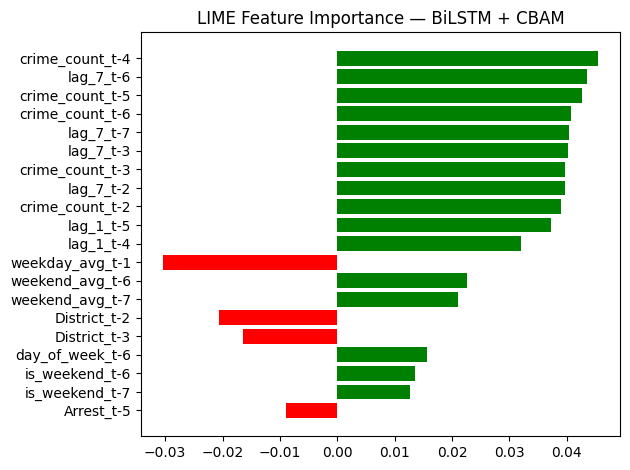

In [88]:
# LIME explanation for BiLSTM + CBAM (regression)

import numpy as np
import pandas as pd
from lime import lime_tabular
import os

# choose sample to explain
explain_index= -1
n_features_to_show= 20
n_samples_in_lime= 5000
html_output = "lime_bilstm_cbam_explanation.html"

# Sanity checks
assert 'X_train' in globals() and 'X_test' in globals(), "X_train / X_test must exist"
assert X_train.ndim == 3 and X_test.ndim == 3, "X_train and X_test should be (N, window, n_features)"
window_size= X_train.shape[1]
n_features= X_train.shape[2]
assert window_size * n_features== X_train.reshape(len(X_train), -1).shape[1]


# I'll label timesteps as t-(window-1)  t-1
feat_names= []
for t in range(window_size):
    lag= window_size - t
    for f in feature_cols:
        feat_names.append(f"{f}_t-{lag}")

# Flattened training data used by LIME
X_train_flat= X_train.reshape(len(X_train), -1)
X_test_flat= X_test.reshape(len(X_test), -1)

# Define predict function LIME will call
def lime_predict_fn(flat_batch):
    """
    flat_batch: np.array shape (B, window*n_features)
    returns: np.array shape (B,) of model outputs (not scaled back)
    """
    # reshape to model input shape
    X_batch= flat_batch.reshape((flat_batch.shape[0], window_size, n_features)).astype(np.float32)
    preds= model_cbam.predict(X_batch, verbose=0)  # returns shape (B, 1) or (B,)
    preds= np.array(preds).reshape(-1)
    return preds

# Build the LIME explainer
explainer= lime_tabular.LimeTabularExplainer(
    training_data=X_train_flat.astype(np.float32),
    feature_names=feat_names,
    mode='regression',
    discretize_continuous=False,   # keep continuous values
)

# Choose the instance to explain
flat_instance= X_test_flat[explain_index].astype(np.float32)

# Run LIME explanation
exp= explainer.explain_instance(
    data_row=flat_instance,
    predict_fn=lime_predict_fn,
    num_features=n_features_to_show,
    num_samples=n_samples_in_lime
)

# Get explanation as list and dataframe
exp_list= exp.as_list(label=0)
exp_df= pd.DataFrame(exp_list, columns=['feature', 'weight'])


try:

    flat_instance_2d= flat_instance.reshape(1, -1)

    inv_original_values= []
    # reshape flattened -> (window, n_features)
    inst_window = flat_instance.reshape(window_size, n_features)

    try:

        inv_rows= feature_scaler.inverse_transform(inst_window)  # works if scaler supports it
        # Build df
        readable= []
        for t in range(window_size):
            lag= window_size - t
            for fi, fname in enumerate(feature_cols):
                scaled_val= inst_window[t, fi]
                orig_val= inv_rows[t, fi]
                readable.append({'feature': f"{fname}_t-{lag}", 'scaled': scaled_val, 'original': orig_val})
        readable_df= pd.DataFrame(readable)
    except Exception:
        readable_df= None
except Exception:
    readable_df= None

#Print and save results
print("\nTop LIME explanation (feature, weight):")
print(exp_df.head(n_features_to_show).to_string(index=False))

if readable_df is not None:
    print("\nCorresponding instance values (unscaled) for explained features (first 30 shown):")
    print(readable_df.head(30).to_string(index=False))

# visualize using matplotlib inline
try:
    fig = exp.as_pyplot_figure()
    plt.title("LIME Feature Importance — BiLSTM + CBAM")
    plt.tight_layout()
    plt.show()
except Exception:
    pass


